In [40]:
import pandas as pd
import scipy as scp
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uc
from math import e

In [41]:
df_inv_1k_68k=pd.read_csv('M1_1k_68k.txt',sep='\t')
df_inv_1k_100k=pd.read_csv('M1_1k_100k.txt',sep='\t')
df_inv_10k_100k=pd.read_csv('M1_10k_100k.txt',sep='\t')
df_int=pd.read_csv('M2_Integrator.txt', sep='\t')
df_diff=pd.read_csv('M3_Differentiator.txt', sep='\t')
df_ged_schwing=pd.read_csv('scope_16.csv')

In [42]:
df_ged_schwing

,x-axis,1,2
0,second,Volt,Volt
1,-9.2600E-03,NaN,NaN
2,-9.2500E-03,-46.7940E-03,-467.1106E-03
3,-9.2400E-03,-84.4824E-03,-484.6985E-03
4,-9.2300E-03,-46.7940E-03,-467.1106E-03
...,...,...,...
1996,+10.6900E-03,-46.7940E-03,+477.6131E-03
1997,+10.7000E-03,-84.4824E-03,+458.7688E-03
1998,+10.7100E-03,-46.7940E-03,+477.6131E-03
1999,+10.7200E-03,-6.5930E-03,+477.6131E-03


In [43]:
df_ged_schwing
df_ged_schwing = df_ged_schwing.apply(pd.to_numeric, args=('coerce',))
df_ged_schwing

,x-axis,1,2
0,NaN,NaN,NaN
1,-0.00926,NaN,NaN
2,-0.00925,-0.046794,-0.467111
3,-0.00924,-0.084482,-0.484698
4,-0.00923,-0.046794,-0.467111
...,...,...,...
1996,0.01069,-0.046794,0.477613
1997,0.01070,-0.084482,0.458769
1998,0.01071,-0.046794,0.477613
1999,0.01072,-0.006593,0.477613


In [44]:
x1=scp.stats.linregress(np.log(df_inv_1k_68k['#Frequenz [kH]'][2:]),np.log(df_inv_1k_68k['#Amplitude [V]'][2:]))
x1

LinregressResult(slope=-0.980124219838675, intercept=4.150709884709497, rvalue=-0.9946531042802886, pvalue=3.299765284459144e-16, stderr=0.026275343054356186, intercept_stderr=0.11994431783566913)

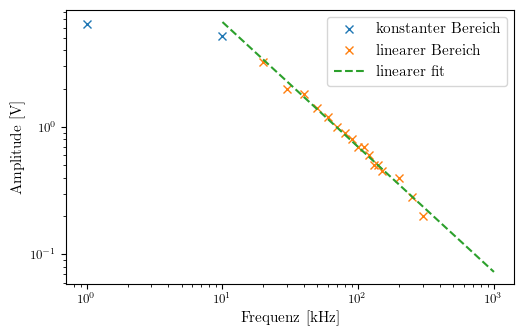

In [45]:
plt.plot(df_inv_1k_68k['#Frequenz [kH]'][:2],df_inv_1k_68k['#Amplitude [V]'][:2],'x',label='konstanter Bereich')
plt.plot(df_inv_1k_68k['#Frequenz [kH]'][2:],df_inv_1k_68k['#Amplitude [V]'][2:],'x',label='linearer Bereich')
plt.plot(np.logspace(1,3),np.exp(x1.intercept)*np.logspace(1,3)**x1.slope,label='linearer fit',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Amplitude [V]')
plt.legend()

In [46]:
x1_g=scp.stats.linregress(np.log(df_inv_1k_68k['#Frequenz [kH]'][2:]),np.log(df_inv_1k_68k['#Amplitude [V]'][2:]/0.1))
x1_g

LinregressResult(slope=-0.980124219838675, intercept=6.453294977703543, rvalue=-0.9946531042802886, pvalue=3.299765284459144e-16, stderr=0.026275343054356186, intercept_stderr=0.11994431783566913)

In [47]:
V1_const=uc.ufloat(np.mean(df_inv_1k_68k['#Amplitude [V]'][:2]/0.1),scp.stats.sem(df_inv_1k_68k['#Amplitude [V]'][:2]/0.1))
V1_const
m1=uc.ufloat(x1_g.slope,x1_g.stderr)
a1=uc.ufloat(x1_g.intercept,x1_g.intercept_stderr)
#e**a1
fg1=(V1_const/(e**(a1)*np.sqrt(2)))**(1/m1)
fg1
f1=(np.mean(df_inv_1k_68k['#Amplitude [V]'][:2]/0.1)/(e**(x1_g.intercept)*np.sqrt(2)))**(1/x1_g.slope)
f1
m1
V1_const*fg1

949.0115172772167+/-136.19121890682678

64.0

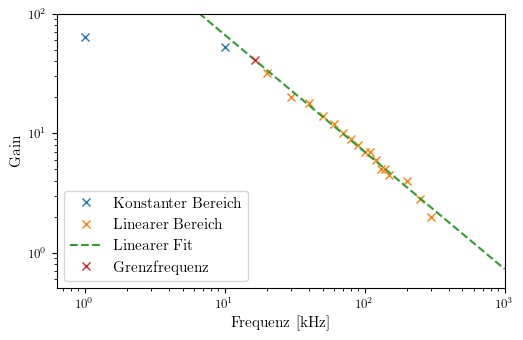

In [48]:
plt.plot(df_inv_1k_68k['#Frequenz [kH]'][:2],df_inv_1k_68k['#Amplitude [V]'][:2]/0.1,'x',label='Konstanter Bereich')
plt.plot(df_inv_1k_68k['#Frequenz [kH]'][2:],df_inv_1k_68k['#Amplitude [V]'][2:]/0.1,'x',label='Linearer Bereich')
plt.plot(np.logspace(0.5,3),np.exp(x1_g.intercept)*np.logspace(0.5,3)**x1_g.slope,label='Linearer Fit',linestyle='--')
plt.plot(f1,np.exp(x1_g.intercept)*f1**x1_g.slope,'x',label='Grenzfrequenz')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Gain')
plt.xlim([10**(-0.2),10**3])
plt.ylim([10**(-0.3),10**2])
plt.legend()
df_inv_1k_68k['#Amplitude [V]'][0]/0.1

In [49]:
x2_g=scp.stats.linregress(np.log(df_inv_10k_100k['#Frequenz [kH]'][5:]),np.log(df_inv_10k_100k['#Amplitude [V]'][5:]/0.1))
x2_g

LinregressResult(slope=-0.7669203924669347, intercept=5.354702248945436, rvalue=-0.9792144649077765, pvalue=1.1133615982006268e-09, stderr=0.04585734168074158, intercept_stderr=0.21927460333250084)

In [50]:
V2_const=uc.ufloat(np.mean(df_inv_10k_100k['#Amplitude [V]'][:5]/0.1),scp.stats.sem(df_inv_10k_100k['#Amplitude [V]'][:5]/0.1))
V2_const
m2=uc.ufloat(x2_g.slope,x2_g.stderr)
a2=uc.ufloat(x2_g.intercept,x2_g.intercept_stderr)
#e**a1
fg2=(V2_const/(e**(a2)*np.sqrt(2)))**(1/m2)
fg2
f2=(np.mean(df_inv_10k_100k['#Amplitude [V]'][:5]/0.1)/(e**(x2_g.intercept)*np.sqrt(2)))**(1/x2_g.slope)
f2
V2_const*fg2

843.2367949842828+/-329.17542874629066

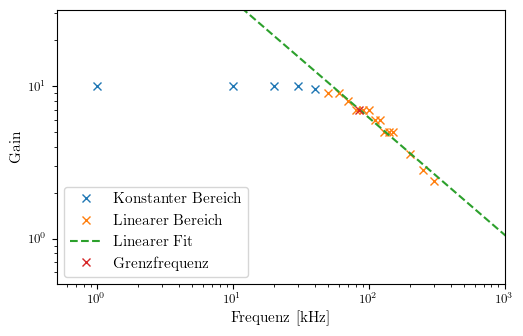

In [51]:
plt.plot(df_inv_10k_100k['#Frequenz [kH]'][:5],df_inv_10k_100k['#Amplitude [V]'][:5]/0.1,'x',label='Konstanter Bereich')
plt.plot(df_inv_10k_100k['#Frequenz [kH]'][5:],df_inv_10k_100k['#Amplitude [V]'][5:]/0.1,'x',label='Linearer Bereich')
plt.plot(np.logspace(1,3.2),np.exp(x2_g.intercept)*np.logspace(1,3.2)**x2_g.slope,linestyle='--',label='Linearer Fit')
plt.plot(f2,np.exp(x2_g.intercept)*f2**x2_g.slope,'x',label='Grenzfrequenz')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Gain')
plt.xlim([10**(-0.3),10**3])
plt.ylim([10**(-0.3),10**1.5])
plt.legend()

In [52]:
x3_g=scp.stats.linregress(np.log(df_inv_1k_100k['#Frequenz [kH]'][4:]),np.log(df_inv_1k_100k['#Amplitude [V]'][4:]/0.1))
x3_g

LinregressResult(slope=-0.9549939873736917, intercept=6.405270268840066, rvalue=-0.9964789970057194, pvalue=2.2029480084584987e-15, stderr=0.022285705226222786, intercept_stderr=0.10511496865694768)

In [53]:
V3_const=uc.ufloat(np.mean(df_inv_1k_100k['#Amplitude [V]'][:2]/0.1),scp.stats.sem(df_inv_1k_100k['#Amplitude [V]'][:2]/0.1))
V3_const
m3=uc.ufloat(x3_g.slope,x3_g.stderr)
a3=uc.ufloat(x3_g.intercept,x3_g.intercept_stderr)
#e**a1
fg3=(V3_const/(e**(a3)*np.sqrt(2)))**(1/m3)
fg3
f3=(np.mean(df_inv_1k_100k['#Amplitude [V]'][:2]/0.1)/(e**(x3_g.intercept)*np.sqrt(2)))**(1/x3_g.slope)
fg3
V3_const*fg3

956.7348245401749+/-119.524064352722

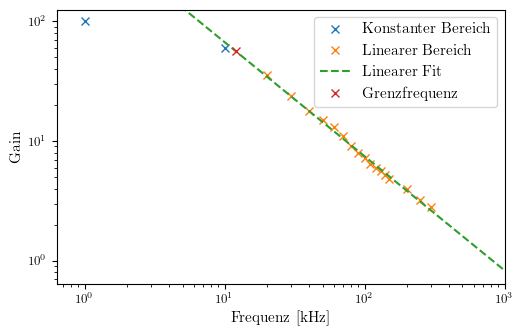

In [54]:
plt.plot(df_inv_1k_100k['#Frequenz [kH]'][:2],df_inv_1k_100k['#Amplitude [V]'][:2]/0.1,'x',label='Konstanter Bereich')
plt.plot(df_inv_1k_100k['#Frequenz [kH]'][2:],df_inv_1k_100k['#Amplitude [V]'][2:]/0.1,'x',label='Linearer Bereich')
plt.plot(np.logspace(0,3),np.exp(x3_g.intercept)*np.logspace(0,3)**x3_g.slope,linestyle='--',label='Linearer Fit')
plt.plot(f3,np.exp(x3_g.intercept)*f3**x3_g.slope,'x',label='Grenzfrequenz')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Gain')
plt.xlim([10**(-0.2),10**3])
plt.ylim([10**-(0.2),10**2.1])
plt.legend()

In [55]:
df_inv_10k_100k['Phase']=[1/2,1/2,1/2,9/20,2/5,3/8,5/13,5/11,3/10,3/9,5/20,2/7,2/7,2/6,2/6,5/13,2/10,3/16,5/26]
df_inv_1k_68k['Phase']=[1/2,3/8,3/10,5/13,3/10,2/8,2/7,3/12,2/10,2/9,2/8,2/7,5/17,4/16,3/14,3/13,2/10,3/20,3/14]
df_inv_1k_100k['Phase']=[1/2,3/8,3/10,4/14,3/10,2/8,3/13,3/12,2/10,2/9,5/20,5/18,5/17,4/15,3/14,3/13,2/12,1/10,1/9]
df_inv_1k_68k
df_inv_1k_100k

,#Frequenz [kH],#Amplitude [V],#Phase[Teil von 360],Phase
0,1,10.00,1/2,0.500000
1,10,6.00,3/8,0.375000
2,20,3.60,3/10,0.300000
3,30,2.40,4/14,0.285714
4,40,1.80,3/10,0.300000
5,50,1.50,2/8,0.250000
6,60,1.30,3/13,0.230769
7,70,1.10,3/12,0.250000
8,80,0.90,2/10,0.200000
9,90,0.80,2/9,0.222222


In [56]:
df_inv_10k_100k[1:2]

,#Frequenz [kH],#Amplitude [V],#Phase[Teil von 360],Phase
1,10,1.0,1/2,0.5


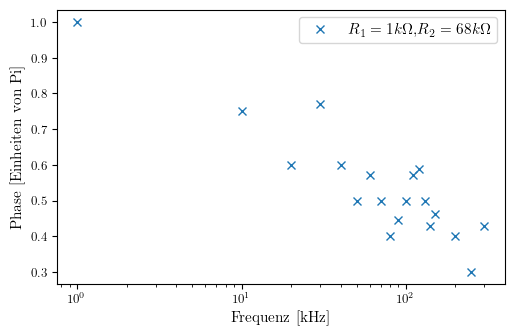

In [57]:
plt.plot(df_inv_1k_68k['#Frequenz [kH]'],df_inv_1k_68k['Phase']*2,'x',label='$R_1=1k\Omega$,$R_2=68k\Omega$')
#plt.plot(df_inv_10k_100k['#Frequenz [kH]'],df_inv_10k_100k['Phase']*2,'x',label='R1=10k,R2=100k')
#plt.plot(df_inv_1k_100k['#Frequenz [kH]'],df_inv_1k_100k['Phase']*2,'x',label='R1=1k,R2=100k')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Phase [Einheiten von Pi]')
plt.legend()

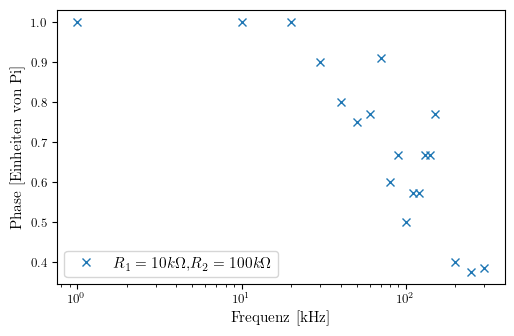

In [58]:
#plt.plot(df_inv_1k_68k['#Frequenz [kH]'],df_inv_1k_68k['Phase']*2,'x',label='R1=1k,R2=68k')
plt.plot(df_inv_10k_100k['#Frequenz [kH]'],df_inv_10k_100k['Phase']*2,'x',label='$R_1=10k\Omega$,$R_2=100k\Omega$')
#plt.plot(df_inv_1k_100k['#Frequenz [kH]'],df_inv_1k_100k['Phase']*2,'x',label='R1=1k,R2=100k')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Phase [Einheiten von Pi]')
plt.legend()

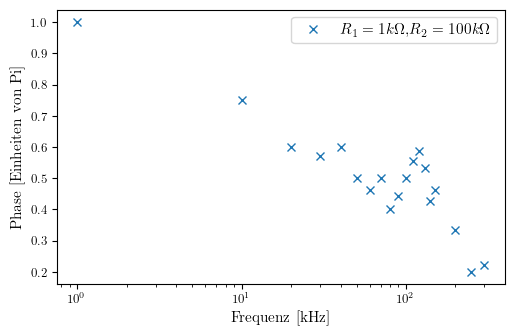

In [59]:
#plt.plot(df_inv_1k_68k['#Frequenz [kH]'],df_inv_1k_68k['Phase']*2,'x',label='R1=1k,R2=68k')
#plt.plot(df_inv_10k_100k['#Frequenz [kH]'],df_inv_10k_100k['Phase']*2,'x',label='R1=10k,R2=100k')
plt.plot(df_inv_1k_100k['#Frequenz [kH]'],df_inv_1k_100k['Phase']*2,'x',label='$R_1=1k\Omega$,$R_2=100k\Omega$')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequenz [kHz]')
plt.ylabel('Phase [Einheiten von Pi]')
plt.legend()

In [60]:
df_int

,#Frequenz [Hz],#Amplitude [V]
0,10,5.20
1,20,3.90
2,30,2.80
3,40,2.40
4,50,2.00
5,60,1.60
6,80,1.20
7,100,1.00
8,150,0.70
9,200,0.55


In [61]:
x4=scp.stats.linregress(np.log(df_int['#Frequenz [Hz]']),np.log(df_int['#Amplitude [V]']))
a4=uc.ufloat(x4.intercept,x4.intercept_stderr)
print(x4)
e**a4

LinregressResult(slope=-0.8946143947356756, intercept=4.052288791680253, rvalue=-0.9964488498853387, pvalue=1.2574456733641843e-18, stderr=0.01889881134915817, intercept_stderr=0.09907330603124193)


57.52897832258667+/-5.699586075018312

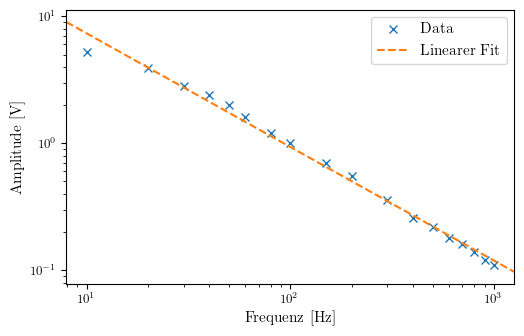

In [62]:
plt.plot(df_int['#Frequenz [Hz]'],df_int['#Amplitude [V]'],'x',label='Data')
plt.plot(np.logspace(0.9,3.1),np.exp(x4.intercept)*np.logspace(0.9,3.1)**x4.slope,linestyle='--',label='Linearer Fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim([10**0.9,10**3.1])
plt.legend()

In [63]:
x5=scp.stats.linregress(np.log(df_diff['#Frequenz [Hz]']),np.log(df_diff['#Amplitude [V]']))
print(x5)
a5=uc.ufloat(x5.intercept,x5.intercept_stderr)
e**a5

LinregressResult(slope=0.9580603698517689, intercept=-4.7084495753234235, rvalue=0.998935423864911, pvalue=8.266348048772685e-23, stderr=0.011060715348247836, intercept_stderr=0.05798362745550264)


0.009018749640320262+/-0.0005229398192587785

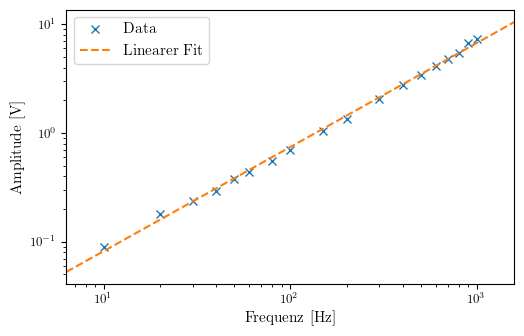

In [64]:
plt.plot(df_diff['#Frequenz [Hz]'],df_diff['#Amplitude [V]'],'x',label='Data')
plt.plot(np.logspace(0.8,3.2),np.exp(x5.intercept)*np.logspace(0.8,3.2)**x5.slope,linestyle='--',label='Linearer Fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Amplitude [V]')
plt.xlim([10**0.8,10**3.2])
plt.legend()

In [65]:
print(np.mean([1.45,1.6,1.65]))
print(np.mean([-1.6,-1.5,-1.4]))
print(scp.stats.sem([1.45,1.6,1.65]))
print(scp.stats.sem([-1.6,-1.5,-1.4]))

1.5666666666666664
-1.5
0.06009252125773316
0.05773502691896263


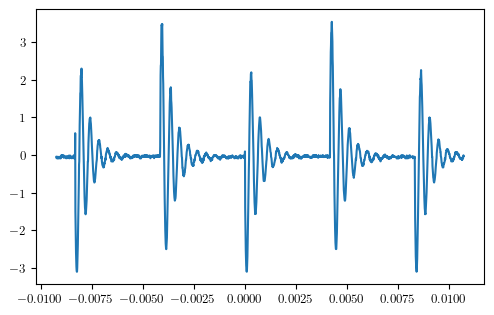

In [66]:
df_ged_schwing=df_ged_schwing.dropna()
df_ged_schwing['x-axis']
#plt.plot(df_ged_schwing['x-axis'],df_ged_schwing['1'])
plt.plot(df_ged_schwing['x-axis'],df_ged_schwing['1'])

In [67]:
df_ged_schwing_b=df_ged_schwing[400:900]

In [68]:
peaks,properties=scp.signal.find_peaks(df_ged_schwing_b['1'],height=0.0025,distance=10)
peaks
#df_ged_schwing['1'][400:900][peaks]
df_peaks=pd.DataFrame([])
df_peaks_x=np.array(df_ged_schwing_b['x-axis'])
df_peaks_1=np.array(df_ged_schwing_b['1'])
df_peaks_2=np.array(df_ged_schwing_b['2'])
#for i in range(np.size(peaks)):
#    df_peaks['x-axis'][i:i+1]=df_ged_schwing_b['x-axis'][peaks[i]:peaks[i+1]]
#    df_peaks['1'][i:i+1]=df_ged_schwing_b['1'][peaks[i]:peaks[i+1]]
#    df_peaks['2'][i:i+1]=df_ged_schwing_b['2'][peaks[i]:peaks[i+1]]
df_peaks_x=df_peaks_x[peaks]
df_peaks_1=df_peaks_1[peaks]
df_peaks_2=df_peaks_2[peaks]
df_peaks_x

array([-0.00406, -0.00364, -0.00323, -0.00278, -0.00236, -0.0019 ])

In [69]:
print(peaks)
df_peaks_x

[119 161 202 247 289 335]


array([-0.00406, -0.00364, -0.00323, -0.00278, -0.00236, -0.0019 ])

In [70]:
x6=scp.stats.linregress(df_peaks_x,np.log(df_peaks_1))
print(x6)
a6=uc.ufloat(x6.intercept,x6.intercept_stderr)
m6=uc.ufloat(x6.slope,x6.stderr)
e**a6
1/m6

LinregressResult(slope=-1912.8358898606816, intercept=-6.497924510165796, rvalue=-0.9958900472267338, pvalue=2.530285562884212e-05, stderr=86.98072953642581, intercept_stderr=0.2682668171724396)


-0.0005227840011266379+/-2.3772104051894652e-05

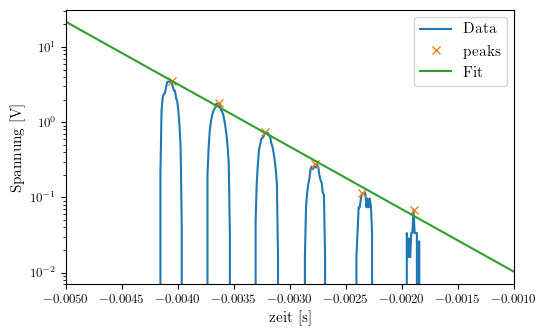

In [71]:
df_ged_schwing=df_ged_schwing.dropna()
df_ged_schwing['x-axis']
#plt.plot(df_ged_schwing['x-axis'],df_ged_schwing['1'])
plt.plot(df_ged_schwing_b['x-axis'],df_ged_schwing_b['1'],label='Data')
plt.plot(df_peaks_x,df_peaks_1,'x',label='peaks')
plt.plot(np.linspace(-0.005,-0.001),e**x6.intercept*e**(x6.slope*np.linspace(-0.005,-0.001)),label='Fit')
#plt.ylim([-3,4])
plt.xlim([-0.005,-0.001])
plt.yscale('log')
plt.xlabel('zeit [s]')
plt.ylabel('Spannung [V]')
plt.legend()

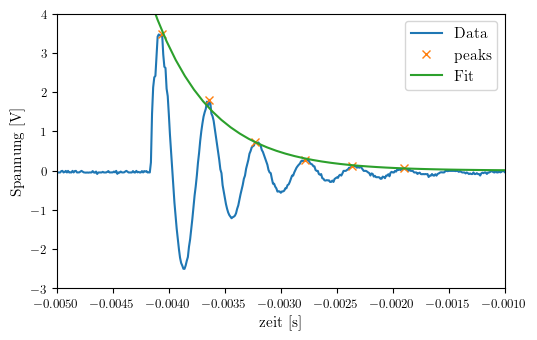

In [72]:
df_ged_schwing=df_ged_schwing.dropna()
df_ged_schwing['x-axis']
#plt.plot(df_ged_schwing['x-axis'],df_ged_schwing['1'])
plt.plot(df_ged_schwing_b['x-axis'],df_ged_schwing_b['1'],label='Data')
plt.plot(df_peaks_x,df_peaks_1,'x',label='peaks')
plt.plot(np.linspace(-0.005,-0.001),e**x6.intercept*e**(x6.slope*np.linspace(-0.005,-0.001)),label='Fit')
plt.ylim([-3,4])
plt.xlim([-0.005,-0.001])
#plt.yscale('log')
plt.xlabel('zeit [s]')
plt.ylabel('Spannung [V]')
plt.legend()

In [73]:
np.max(df_ged_schwing['x-axis'])
1/np.diff(df_peaks_x)

array([2380.95238095, 2439.02439024, 2222.22222222, 2380.95238095,
       2173.91304348])

In [74]:
print(68000/(4*10000*1000*10**(-6)))
15*10/68

1700.0


2.2058823529411766

In [75]:
T=2*np.pi*1000*69*10**(-9)
print(T)
T_exp=np.mean(np.diff(df_peaks_x))
print(T_exp)
scp.stats.sem(np.diff(df_peaks_x))
print(20*1000*69*10**(-9))
print(1/x6.slope)

0.0004335397861953915
0.0004320000000000001
0.0013800000000000002
-0.0005227840011266379


In [76]:
print(68000/(4*10000*1000*10**(-6)))
print(14*10/100)

1700.0
1.4
